In [ ]:
sns.set_style("white")
sns.set_style("ticks")
sns.set_context("talk")

colors = creb.colors
sns.set_palette(colors)

In [ ]:
def add_ss_col(df,threshold = 1.75 ,col_name="ss"):
    df.loc[df.eval('spatial_information < @threshold'), col_name] = "low"
    df.loc[df.eval('spatial_information > @threshold'), col_name] = "high"
    return df

def just_day(df,shuffle=False):
    df_day = df[df.pairing =='day']
    if shuffle:
        return rm_shuffle(df_day), just_shuffle(df_day)
    else: 
        return rm_shuffle(df_day)

def just_session(df,shuffle=False):
    df_sess = df[df.pairing =='session']
    if shuffle:
        return rm_shuffle(df_sess), just_shuffle(df_sess)
    else: 
        return rm_shuffle(df_sess)

def rm_shuffle(df):
    return df[(df.grp !='shuffle')]

def just_shuffle(df):
    return df[(df.grp =='shuffle')]

In [ ]:
# save 
#mjdhelp.save_pickle(all_dfs,'STABILITY-PCBOTH-DAY-SESSION-WITH-SHUFFLE-BY-ROI.pkl')


all_dfs_roi = mjdhelp.read_from_pickle('STABILITY-PCBOTH-DAY-SESSION-WITH-SHUFFLE-BY-ROI.pkl')

all_dfs = mjdhelp.read_from_pickle('STABILITY-PCBOTH-DAY-SESSION-WITH-SHUFFLE.pkl')

# remove bad dn session
for key,df in all_dfs.items():
    #df.drop(df.loc[df.trial_id == '12453'].index,inplace=True)
    df.drop(df.query('trial_id == 12813').index,inplace=True)
    
    
for key,df in all_dfs_roi.items():
    #df.drop(df.loc[df.trial_id == '12453'].index,inplace=True)
    df.drop(df.query('trial_id == 12813').index,inplace=True)
    
print(all_dfs.keys())

In [ ]:
# remove non roi measures
all_dfs_roi.pop("recurrence")
all_dfs_roi.pop('pop_vector')


key = "centroid_shift" # start key
df_comb = all_dfs_roi.pop(key)
df_comb = mjdplot.roi_to_label(df_comb,col="first_roi")
df_comb.rename(columns = {'value':key},inplace=True)

for key,df in all_dfs_roi.items():
    df = just_session(df) # NEEDED FOR BIG ROI DF???
        
    df  = mjdplot.roi_to_label(df,col="first_roi")    
    
    df.rename(columns = {'value':key},inplace=True)
    
    df_comb = pd.merge(df_comb,df,on=["grp","trial_id","first_roi"],suffixes=['', '_y'])

df_comb.trial_id = df_comb.trial_id.astype('int64') # for merge later




df_merge = pd.merge(df_comb,df_rew,on=["grp","trial_id","roi_label"],suffixes=['', '_z']) # 


In [515]:

df_rew = pd.read_csv('big-df-by-roi.csv')
df_rew.rename(columns = {'expt_grp':'grp'}, inplace = True)
df_rew.drop(df_rew.query('trial_id == 12813').index,inplace=True)

df_rew_all = df_rew # all cells 
df_rew = df_rew.query("pc == 1") # just pcs

df_tune = add_ss_col(df_rew,threshold = 1)
df_tune_all = add_ss_col(df_rew_all,threshold = 1)
#df_tune_stab = add_ss_col(df_merge) # merged for stability measures

# Set key

In [ ]:
key = 'spatial_information'

# Basics

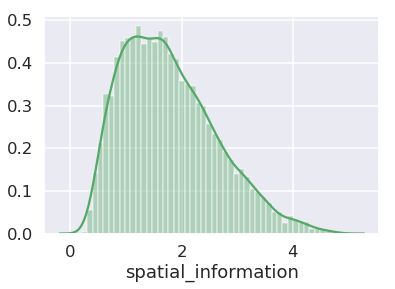

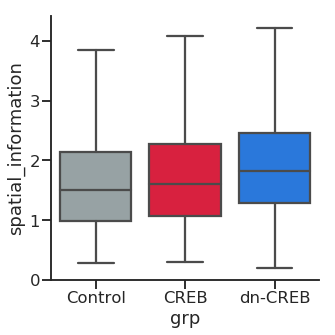

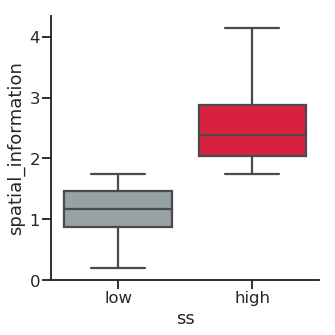

In [461]:
with sns.axes_style("darkgrid"):
    sns.distplot(df_tune[key].dropna(),color='g')
    
    
sns.catplot(data = df_tune, x = "grp", y = key, kind="box", showfliers=False)

## just to show the split worked
sns.catplot(data = df_tune, x = "ss", y = key, kind="box",showfliers=False)

## all

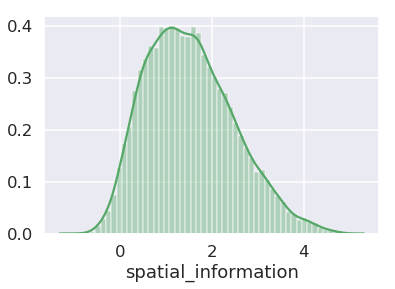

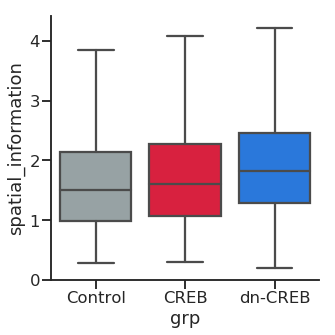

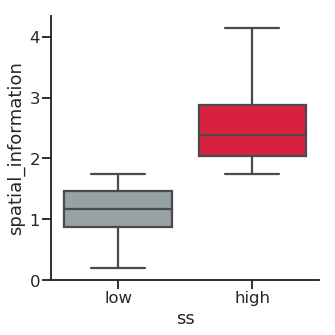

In [490]:
with sns.axes_style("darkgrid"):
    sns.distplot(df_tune_all[key].dropna(),color='g')
    
    
sns.catplot(data = df_tune, x = "grp", y = key, kind="box", showfliers=False)

## just to show the split worked
sns.catplot(data = df_tune, x = "ss", y = key, kind="box",showfliers=False)

## correlations with other measures

In [ ]:
## just to show the split worked
sns.catplot(data = df_tune, x = "ss", y = "pf_correlation", kind="box",showfliers=False)

# Session 1

In [516]:
thresh=1

df_s1 = df_rew.query("session=='1' and day =='1'")
df_s1=  add_ss_col(df_s1,threshold = thresh)
#print axs size
df_s1.groupby(["grp","ss"]).size()

grp      ss  
CREB     high    259
         low     144
Control  high    133
         low      67
dn-CREB  high    214
         low      51
dtype: int64

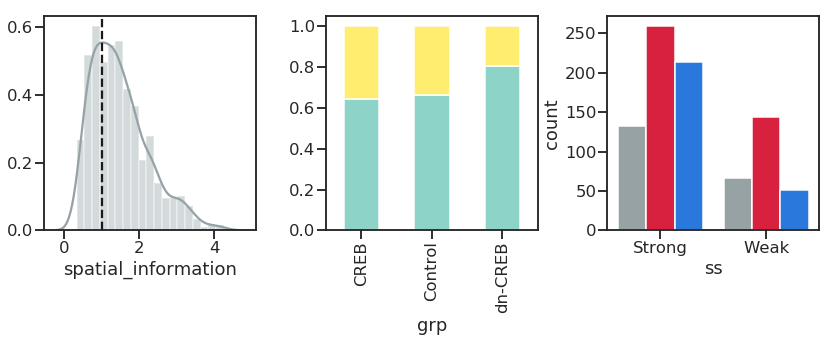

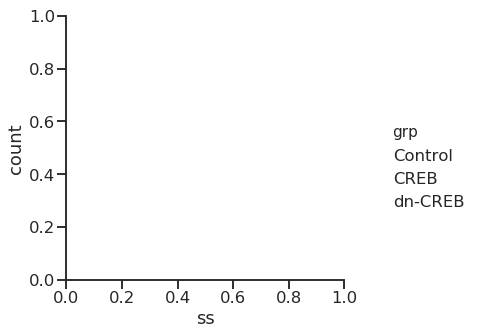

In [500]:
# fig to save
fig,axs = plt.subplots(1,3,figsize=(12,4))
plt.tight_layout()

sns.distplot(df_s1.spatial_information,ax=axs[0])
axs[0].axvline(thresh, linestyle='--', color='k')


sns.catplot(kind="count",x="ss",hue="grp",data = df_s1,ax=axs[2],legend=True)
axs[2].get_legend().remove()
axs[2].set_xticklabels(["Strong","Weak"])

props = df_s1.groupby("grp")['ss'].value_counts(normalize=True).unstack()
props.plot(kind='bar', stacked='True',ax=axs[1],legend=False,colormap='Set3')

#fig.savefig('figs/weak/spatial-info-dist.svg')

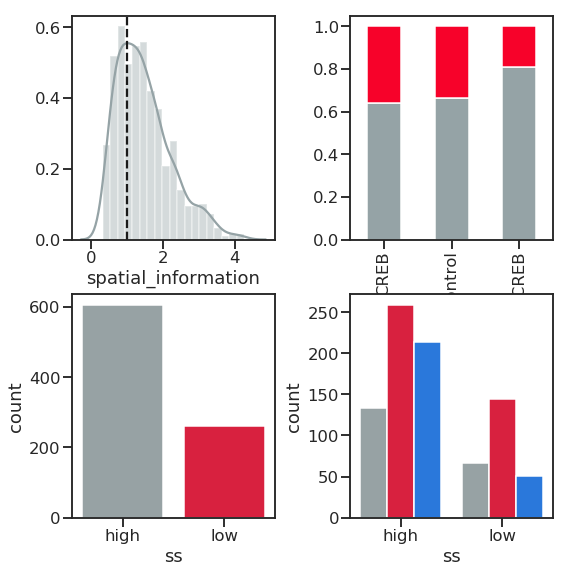

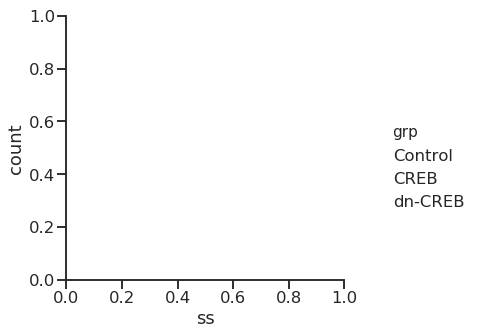

In [469]:
fig,axs = plt.subplots(2,2,figsize=(8,8))
plt.tight_layout()

sns.distplot(df_s1.spatial_information,ax=axs[0][0])
axs[0][0].axvline(thresh, linestyle='--', color='k')

sns.countplot(df_s1.ss,ax=axs[1][0])

sns.catplot(kind="count",x="ss",hue="grp",data = df_s1,ax=axs[1][1],legend=True)
axs[1][1].get_legend().remove()

props = df_s1.groupby("grp")['ss'].value_counts(normalize=True).unstack()
props.plot(kind='bar', stacked='True',ax=axs[0][1],legend=False)


# Roi counts

[Text(0,0,'1'),
 Text(0,0,'2'),
 Text(0,0,'3'),
 Text(0,0,'4'),
 Text(0,0,'5'),
 Text(0,0,'6'),
 Text(0,0,'7'),
 Text(0,0,'8'),
 Text(0,0,'9'),
 Text(0,0,'10'),
 Text(0,0,'11'),
 Text(0,0,'12'),
 Text(0,0,'13'),
 Text(0,0,'14'),
 Text(0,0,'15'),
 Text(0,0,'16'),
 Text(0,0,'17'),
 Text(0,0,'18'),
 Text(0,0,'19'),
 Text(0,0,'20'),
 Text(0,0,'21'),
 Text(0,0,'22')]

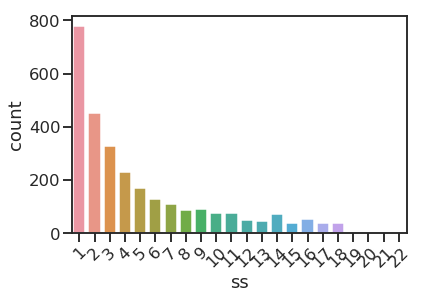

In [249]:
#cnts = df_tune.query("day in ['1','2','3']").groupby("roi_label").count()
cnts = df_tune.groupby("roi_label").count()

ax = sns.countplot(cnts.ss)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

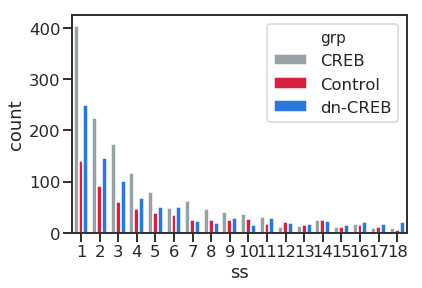

In [266]:
cnts = df_tune.groupby(["grp","roi_label"]).count()
ax = sns.countplot(x ="ss",hue="grp",data = cnts.reset_index()) # need to normalize 

# Session 1 weak cells

In [534]:
nsess_cell = 8

df_multi = df_rew.copy()

ws_rois = df_s1.query("ss=='low'").roi_label
df_ws = df_multi.query("roi_label in @ws_rois.values")
ws_multi = set(df_ws.groupby("roi_label").filter(lambda x: len(x) >nsess_cell).roi_label)


ss_rois = df_s1.query("ss=='high'").roi_label
df_ss = df_multi.query("roi_label in @ss_rois.values")
ss_multi = set(df_ss.groupby("roi_label").filter(lambda x: len(x) >nsess_cell).roi_label)


df_multi.loc[df_rew.eval("roi_label in @ws_multi"), "sess1_multi"] = "weak"
df_multi.loc[df_rew.eval("roi_label in @ss_multi"), "sess1_multi"] = "strong"

df_multi.groupby("grp").sess1_multi.count()






grp
CREB       1675
Control    1356
dn-CREB    1868
Name: sess1_multi, dtype: int64

## 1.0

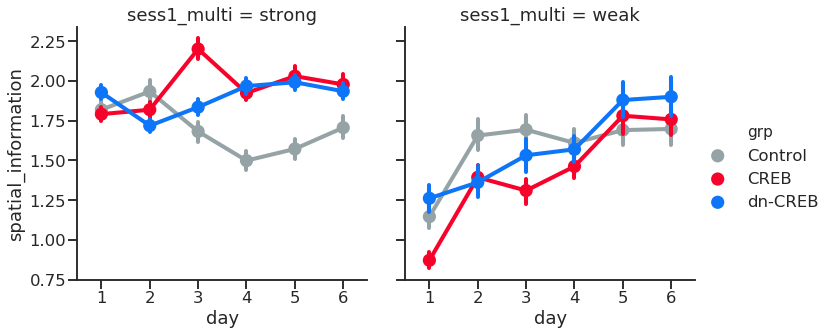

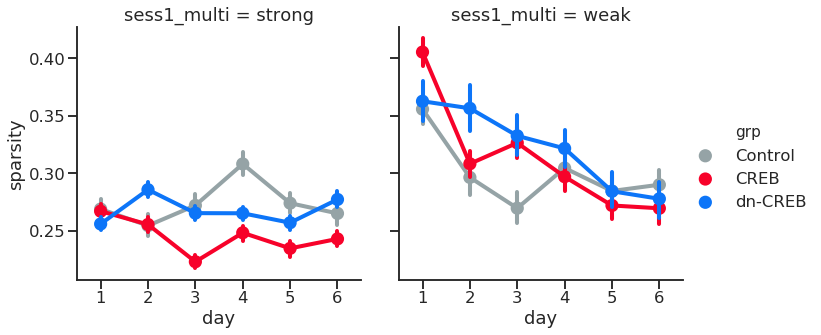

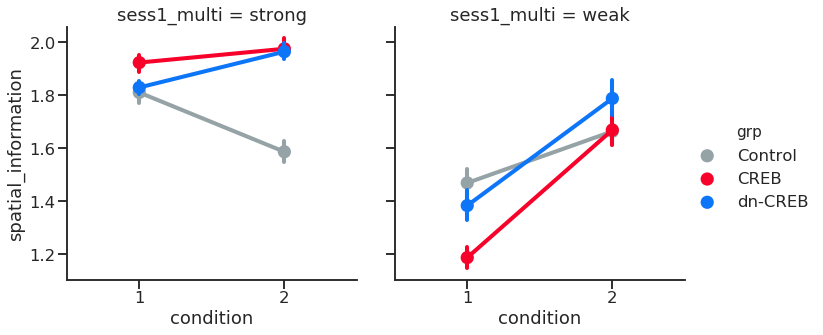

In [541]:
sns.catplot(x='day',y="spatial_information", hue='grp', col= 'sess1_multi',
            data=df_multi.dropna(subset=["sess1_multi"]),
                kind="point", ci=68)
sns.catplot(x='day',y="sparsity", hue='grp',col= 'sess1_multi',
            data=df_multi.dropna(subset=["sess1_multi"]),
                kind="point", ci=68)


sns.catplot(x='condition',y="spatial_information", hue='grp', col= 'sess1_multi',
            data=df_multi.dropna(subset=["sess1_multi"]),
                kind="point", ci=68)



In [552]:
df_multi.dropna(subset=["sess1_multi"]).groupby(["grp","sess1_multi","condition"]).spatial_information.describe()

count      mean       std       min       25%  \
grp     sess1_multi condition                                                  
CREB    strong      1          658.0  1.922806  0.813948  0.386245  1.314544   
                    2          557.0  1.974691  0.873050  0.463714  1.276160   
        weak        1          263.0  1.188042  0.663280  0.291013  0.706889   
                    2          197.0  1.668942  0.822539  0.399103  1.035878   
Control strong      1          464.0  1.810057  0.825945  0.319187  1.177612   
                    2          417.0  1.586718  0.792228  0.356862  0.970779   
        weak        1          248.0  1.469382  0.796447  0.328177  0.800502   
                    2          227.0  1.663488  0.778011  0.339534  1.027947   
dn-CREB strong      1          802.0  1.828885  0.739498  0.388027  1.274121   
                    2          761.0  1.963816  0.799653  0.363044  1.390353   
        weak        1          150.0  1.384045  0.695289  0.431247  0.876548   
                    2          155.0  1.787756  0.841678  0.381293  1.165942   

                                    50%       75%       max  
grp     sess1_multi condition                                
CREB    strong      1          1.823443  2.424712  4.711799  
                    2          1.824617  2.518078  4.636718  
        weak        1          0.975027  1.529655  3.799370  
                    2          1.634008  2.220584  4.498829  
Control strong      1          1.693541  2.390275  4.255677  
                    2          1.421667  2.039919  4.586915  
        weak        1          1.352534  1.980166  3.995784  
                    2          1.618669  2.151405  4.118409  
dn-CREB strong      1          1.733335  2.258155  4.744812  
                    2          1.881070  2.404167  4.764588  
        weak        1          1.234689  1.684045  3.668942  
                    2          1.636238  2.264026  4.500164

In [536]:
import pingouin as pg

df_stat = df_multi.dropna(subset=["sess1_multi"])

ImportError: No module named pingouin

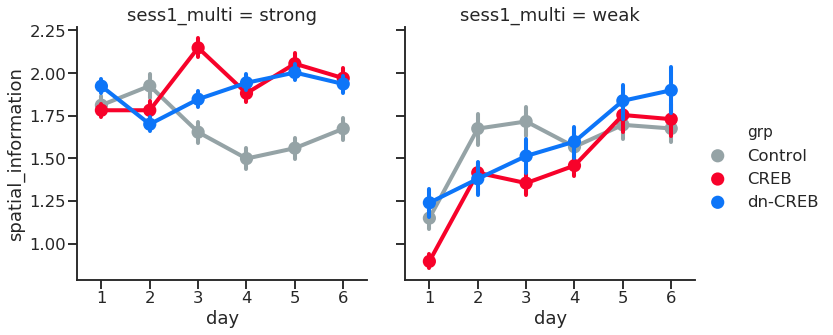

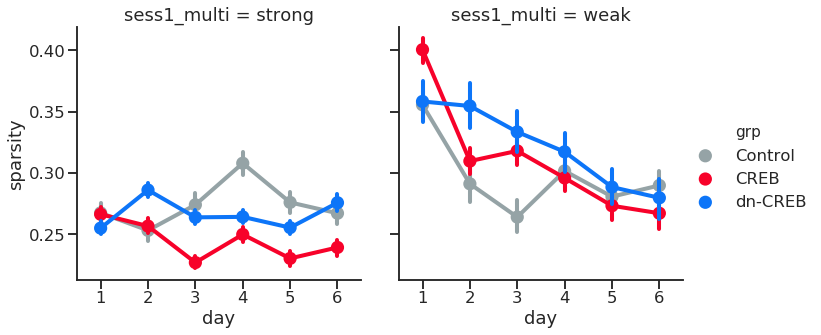

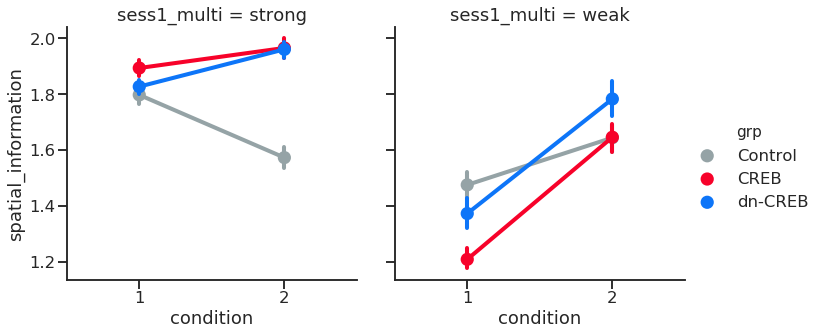

In [504]:
sns.catplot(x='day',y="spatial_information", hue='grp', col= 'sess1_multi',
            data=df_rew.dropna(subset=["sess1_multi"]),
                kind="point", ci=68)
sns.catplot(x='day',y="sparsity", hue='grp',col= 'sess1_multi',
            data=df_rew.dropna(subset=["sess1_multi"]),
                kind="point", ci=68)


sns.catplot(x='condition',y="spatial_information", hue='grp', col= 'sess1_multi',
            data=df_rew.dropna(subset=["sess1_multi"]),
                kind="point", ci=68)



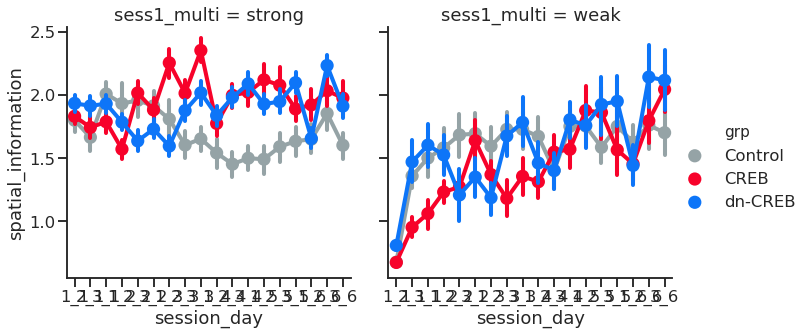

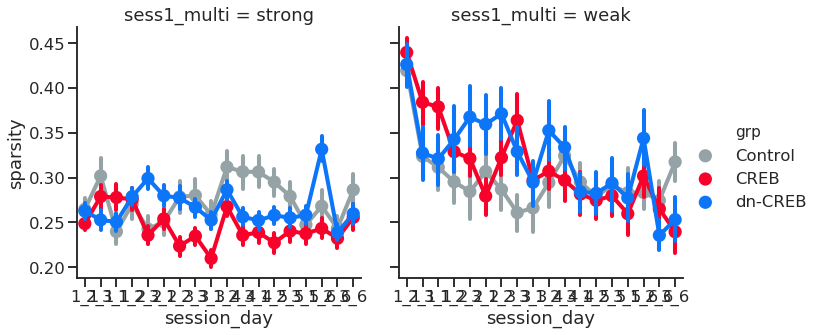

In [472]:
sns.catplot(x='session_day',y="spatial_information", hue='grp', col= 'sess1_multi',
            data=df_rew.dropna(subset=["sess1_multi"]),
                kind="point", ci=68)
sns.catplot(x='session_day',y="sparsity", hue='grp',col= 'sess1_multi',
            data=df_rew.dropna(subset=["sess1_multi"]),
                kind="point", ci=68)

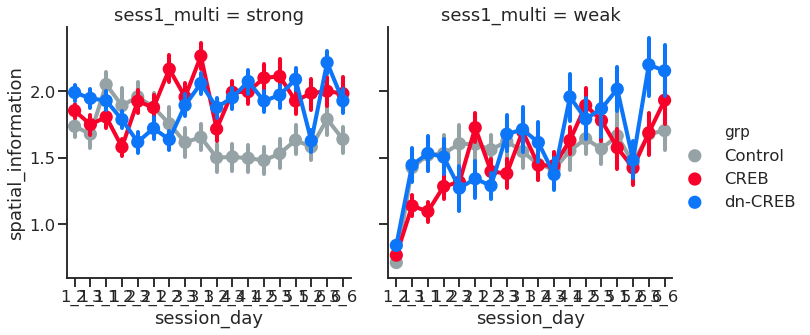

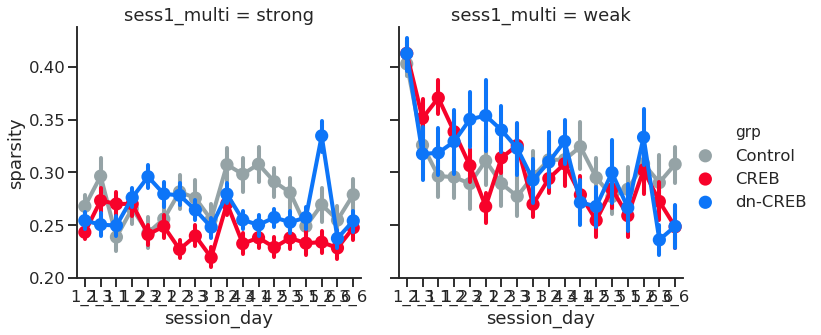

In [446]:
sns.catplot(x='session_day',y="spatial_information", hue='grp', col= 'sess1_multi',
            data=df_rew.dropna(subset=["sess1_multi"]),
                kind="point", ci=68)
sns.catplot(x='session_day',y="sparsity", hue='grp',col= 'sess1_multi',
            data=df_rew.dropna(subset=["sess1_multi"]),
                kind="point", ci=68)

## 1.3

In [475]:
nsess_cell = 8

ws_rois = df_s1.query("ss=='low'").roi_label
df_ws = df_rew.query("roi_label in @ws_rois.values")
ws_multi = set(df_ws.groupby("roi_label").filter(lambda x: len(x) >nsess_cell).roi_label)


ss_rois = df_s1.query("ss=='high'").roi_label
df_ss = df_rew.query("roi_label in @ss_rois.values")
ss_multi = set(df_ss.groupby("roi_label").filter(lambda x: len(x) >nsess_cell).roi_label)


df_rew.loc[df_rew.eval("roi_label in @ws_multi"), "sess1_multi"] = "weak"
df_rew.loc[df_rew.eval("roi_label in @ss_multi"), "sess1_multi"] = "strong"

df_rew.groupby("grp").sess1_multi.count()

grp
CREB       1675
Control    1356
dn-CREB    1868
Name: sess1_multi, dtype: int64

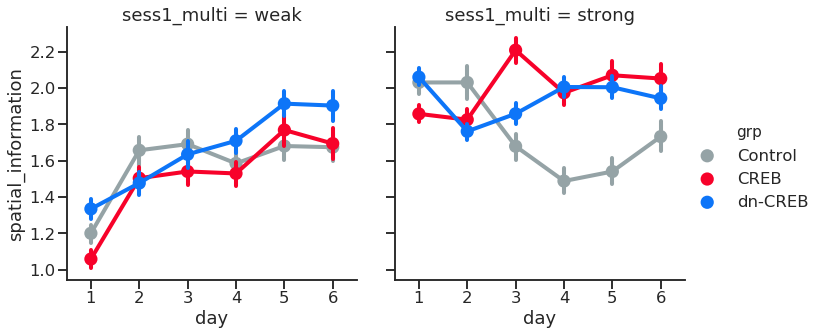

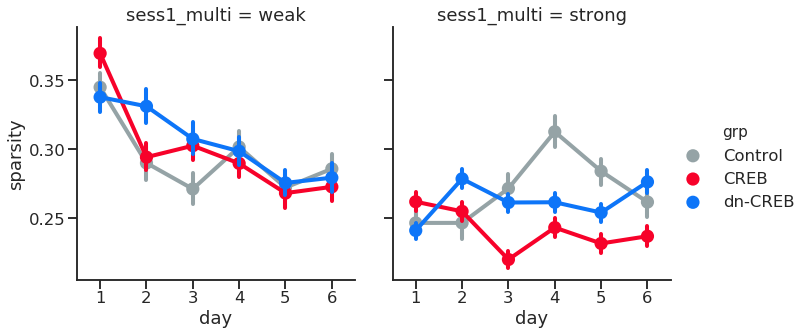

In [476]:
sns.catplot(x='day',y="spatial_information", hue='grp', col= 'sess1_multi',
            data=df_rew.dropna(subset=["sess1_multi"]),
                kind="point", ci=68)
sns.catplot(x='day',y="sparsity", hue='grp',col= 'sess1_multi',
            data=df_rew.dropna(subset=["sess1_multi"]),
                kind="point", ci=68)

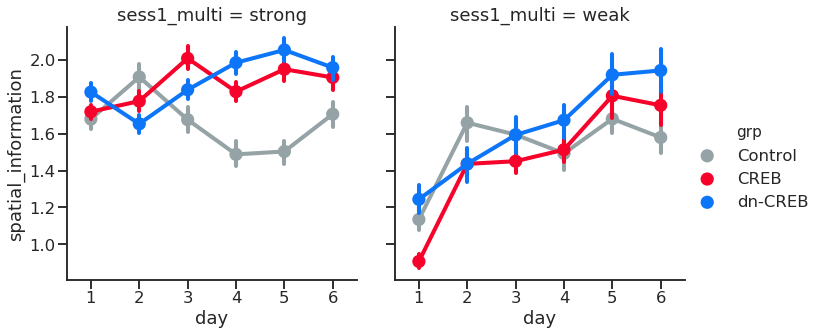

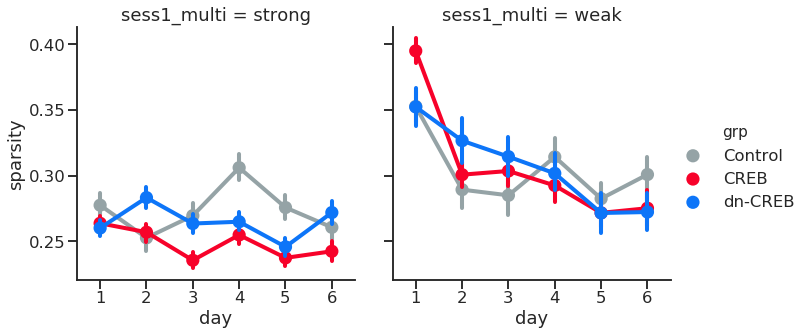

In [228]:
sns.catplot(x='day',y="spatial_information", hue='grp', col= 'sess1_multi',
            data=df_rew.dropna(subset=["sess1_multi"]),
                kind="point", ci=68)
sns.catplot(x='day',y="sparsity", hue='grp',col= 'sess1_multi',
            data=df_rew.dropna(subset=["sess1_multi"]),
                kind="point", ci=68)

## cdfs

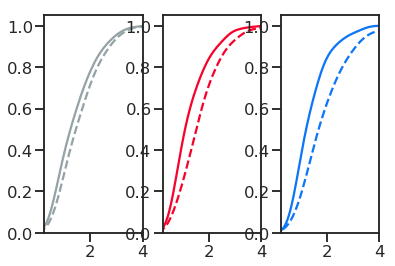

In [414]:
fig,axs = plt.subplots(1,3)


axs_dict={'Control':axs[0],
         'CREB':axs[1],
         'dn-CREB':axs[2]}
color_dict={'Control':colors[0],
         'CREB':colors[1],
         'dn-CREB':colors[2]}


for name, group in df_rew.query("sess1_multi=='weak'").groupby(["grp","condition"]):
    sns.kdeplot(group.spatial_information, cumulative=True,linestyle="--" if name[1]==2 else "-",ax=axs_dict[name[0]],color=color_dict[name[0]])
    
for ax in axs:    
    ax.get_legend().remove()
    ax.set_xlim([.25,4])

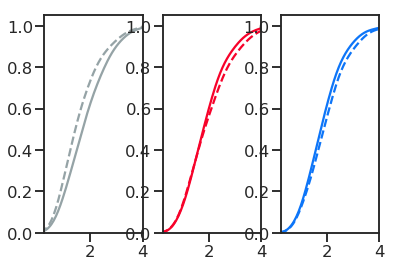

In [415]:
fig,axs = plt.subplots(1,3)


axs_dict={'Control':axs[0],
         'CREB':axs[1],
         'dn-CREB':axs[2]}
color_dict={'Control':colors[0],
         'CREB':colors[1],
         'dn-CREB':colors[2]}


for name, group in df_rew.query("sess1_multi=='strong'").groupby(["grp","condition"]):
    sns.kdeplot(group.spatial_information, cumulative=True,linestyle="--" if name[1]==2 else "-",ax=axs_dict[name[0]],color=color_dict[name[0]])
    
for ax in axs:    
    ax.get_legend().remove()
    ax.set_xlim([.25,4])

(0.25, 4)

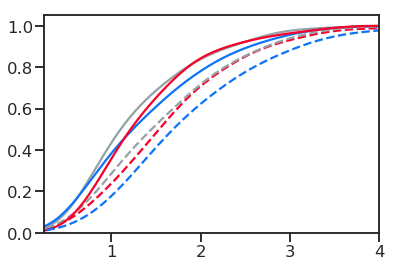

In [389]:
fig,ax = plt.subplots(1)


axs_dictname[0]
for name, group in df_rew.query("sess1_multi=='weak'").groupby(["grp","condition"]):
    sns.kdeplot(group.spatial_information, cumulative=True,ax=ax,linestyle="--" if name[1]==2 else "-")
    
    
ax.get_legend().remove()
ax.set_xlim([.25,4])

(0.25, 4)

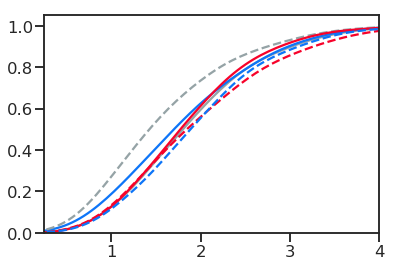

In [391]:
fig,ax = plt.subplots(1)


for name, group in df_rew.query("sess1_multi=='strong'").groupby(["grp","condition"]):
    sns.kdeplot(group.spatial_information, cumulative=True,ax=ax,linestyle="--" if name[1]==2 else "-")
    
    
ax.get_legend().remove()
ax.set_xlim([.25,4])

# All cells

In [480]:
df_s1_all = df_rew_all.query("session=='1' and day =='1'")
df_s1_all =  add_ss_col(df_s1_all,threshold = 1.3)

In [481]:
nsess_cell = 8

ws_rois_all = df_s1_all.query("ss=='low'").roi_label
df_ws_all = df_rew_all.query("roi_label in @ws_rois_all.values")
ws_multi_all = set(df_ws_all.groupby("roi_label").filter(lambda x: len(x) >nsess_cell).roi_label)

ss_rois_all = df_s1_all.query("ss=='high'").roi_label
df_ss_all = df_rew_all.query("roi_label in @ss_rois_all.values")
ss_multi_all = set(df_ss_all.groupby("roi_label").filter(lambda x: len(x) >nsess_cell).roi_label)


df_rew_all.loc[df_rew_all.eval("roi_label in @ws_multi_all"), "sess1_multi"] = "Weak"
df_rew_all.loc[df_rew_all.eval("roi_label in @ss_multi_all"), "sess1_multi"] = "Strong"

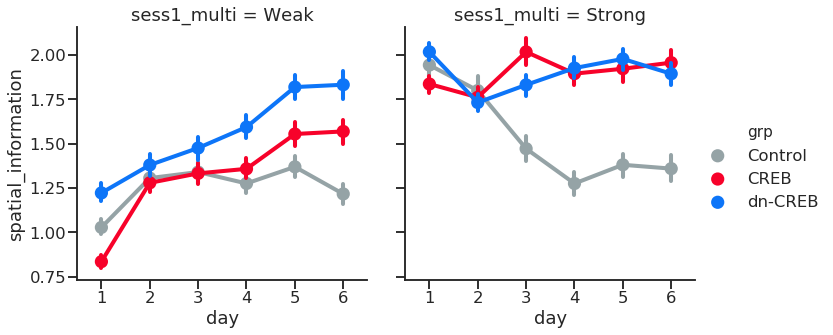

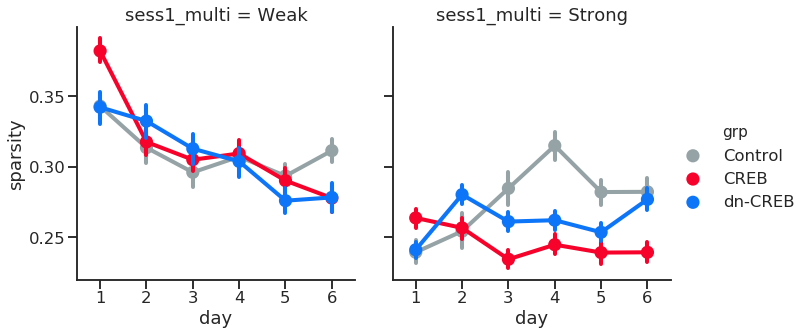

In [482]:
sns.catplot(x='day',y="spatial_information", hue='grp', col= 'sess1_multi',
            data=df_rew_all.dropna(subset=["sess1_multi"]),
                kind="point", ci=68)
sns.catplot(x='day',y="sparsity", hue='grp',col= 'sess1_multi',
            data=df_rew_all.dropna(subset=["sess1_multi"]),
                kind="point", ci=68)

In [452]:
thresh=1

df_d1 = df_tune.query("day =='1'")
df_d1=  add_ss_col(df_d1,threshold = thresh)
#print axs size
df_d1.groupby(["grp","ss"]).size()

grp      ss  
CREB     high    755
         low     363
Control  high    460
         low     194
dn-CREB  high    662
         low     116
dtype: int64

In [453]:
nsess_cell = 8

ws_rois = df_d1.query("ss=='low'").roi_label
df_ws = df_rew.query("roi_label in @ws_rois.values")
ws_multi = set(df_ws.groupby("roi_label").filter(lambda x: len(x) >nsess_cell).roi_label)


ss_rois = df_d1.query("ss=='high'").roi_label
df_ss = df_rew.query("roi_label in @ss_rois.values")
ss_multi = set(df_ss.groupby("roi_label").filter(lambda x: len(x) >nsess_cell).roi_label)


df_rew.loc[df_rew.eval("roi_label in @ws_multi"), "sess1_multi"] = "weak"
df_rew.loc[df_rew.eval("roi_label in @ss_multi"), "sess1_multi"] = "strong"

df_rew.groupby("grp").sess1_multi.count()

grp
CREB       2731
Control    2257
dn-CREB    2838
Name: sess1_multi, dtype: int64

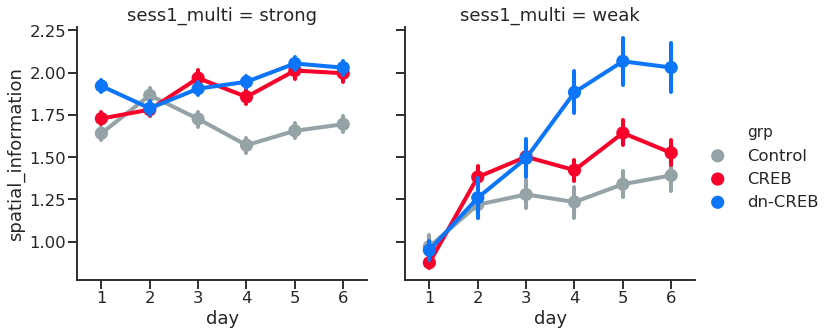

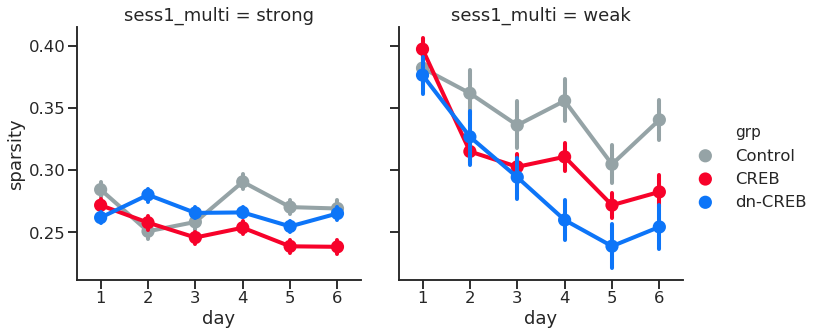

In [454]:
sns.catplot(x='day',y="spatial_information", hue='grp', col= 'sess1_multi',
            data=df_rew.dropna(subset=["sess1_multi"]),
                kind="point", ci=68)
sns.catplot(x='day',y="sparsity", hue='grp',col= 'sess1_multi',
            data=df_rew.dropna(subset=["sess1_multi"]),
                kind="point", ci=68)

# trying to make fancy histogram

(array([47., 85., 95., 55.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([0.32828125, 0.51530011, 0.70231897, 0.88933783, 1.07635668,
        1.26337554, 1.4503944 , 1.63741326, 1.82443211, 2.01145097,
        2.19846983, 2.38548869, 2.57250754, 2.7595264 , 2.94654526,
        3.13356412, 3.32058297, 3.50760183, 3.69462069, 3.88163955,
        4.0686584 , 4.25567726]),
 <a list of 21 Patch objects>)

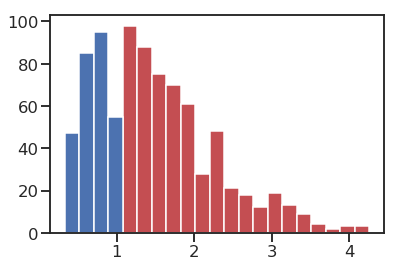

In [165]:
bins=np.histogram(df_s1.spatial_information, bins=21)[1] #get the bin edges

plt.hist(df_s1.query("ss=='high'").spatial_information,bins,color='r')
plt.hist(df_s1.query("ss=='low'").spatial_information,bins,color='b')